<a href="https://colab.research.google.com/github/shuntarotobari/qmacro2nd/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

h_L: 0.133230487352591
h_H: 9.630906315246891


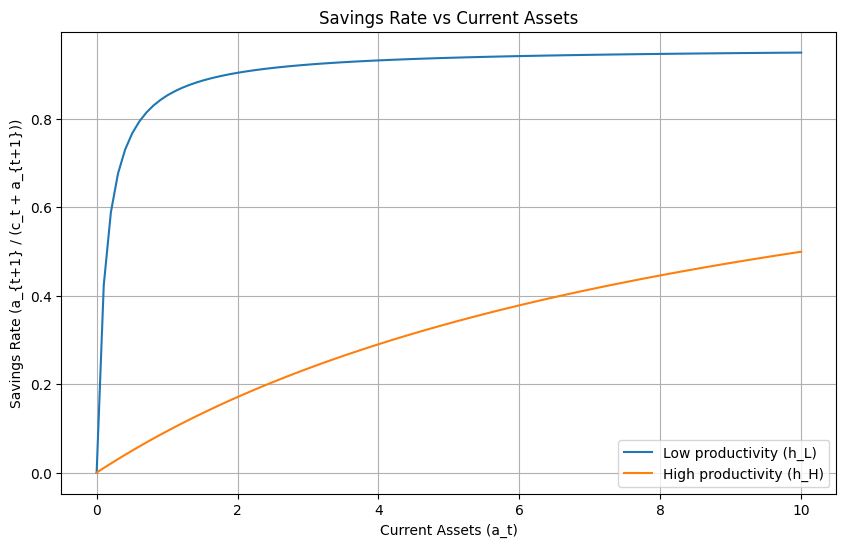

In [4]:
import numpy as np

# パラメータの設定
rho = 0.6
sigma_e = 0.6

T = 1000  # number of time steps
# Initial value of h
h0 = 1
# Arrays to store values
h = np.zeros(T+1)
h[0] = h0
# Simulate the process
for t in range(T):
    epsilon = np.random.normal(0, sigma_e)
    h[t+1] = np.exp(rho * np.log(h[t]) + epsilon)

# Compute h_H and h_L
h_H = np.max(h)
h_L = np.min(h)

print("h_L:", h_L)
print("h_H:", h_H)
import matplotlib.pyplot as plt

# パラメータの設定
sigma = 1.5
beta = 0.98
r = 0.04
w = 1

# 資産の範囲
a_t = np.linspace(0, 10, 100)

# 貯蓄率の計算
def savings_rate(a_t, h, r, w, beta, sigma):
    c_t = (w * h + (1 + r) * a_t - a_t)   # 簡略化した消費関数
    a_t1 = (w * h + (1 + r) * a_t - c_t)  # 次期の資産
    return a_t1 / (c_t + a_t1)

savings_rate_L = savings_rate(a_t, h_L, r, w, beta, sigma)
savings_rate_H = savings_rate(a_t, h_H, r, w, beta, sigma)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(a_t, savings_rate_L, label='Low productivity (h_L)')
plt.plot(a_t, savings_rate_H, label='High productivity (h_H)')
plt.xlabel('Current Assets (a_t)')
plt.ylabel('Savings Rate (a_{t+1} / (c_t + a_{t+1}))')
plt.title('Savings Rate vs Current Assets')
plt.legend()
plt.grid(True)
plt.show()
